## ADAPTED APPLICATION TEMPLATE ERA5 - LATENT HEAT FLUXES

Package c3s_eqc_automatic_quality_control (https://github.com/bopen/c3s-eqc-automatic-quality-control).
This notebook is a first test for the implementation on the following diagnostics on the 
latent heat flux:
- Climatology Maps for the variable;
- Time Series of Globally Averaged variable;
As initial test to carry out the diagnostic proposed in the deliverable submitted on September 2022 C3S2_D520.5.1.6_202209_Consolidated_diagnostics_reanalysis_v1 
Which can be found in the +Atlantic Teams folder 
WP5 EQC of Reanalysis, Satellite and In-situ Obsv > 1_Deliverables > 09_2022 > 2_Submitted

In [1]:
import warnings

import cads_toolbox
import pandas as pd
import plotly.express as px
import xarray as xr
from c3s_eqc_automatic_quality_control import diagnostics, download

warnings.filterwarnings("ignore")

### PROCESSING with Xarray: GLOBAL MONTHLY MEAN SURFACE LATENT HEAT FLUX 1959-2021

APPLICATION SUMMARY:

- Data requests definition

- Processing:

  - chunked download
  - apply transformation to each chunk -> not working, done manually after downloading
  - cache the result on each chunk
  - merge all the chunks

- Plot the result

#### REQUEST DEFINITION

For request definition we use **`c3s_eqc_toolbox_template.update_request_date`**.

It allows to generate the requests for a given period `[start, stop]` if stop is `None` then compute the stop month as follows:
if `current day > switch_month_day`: then `stop_month = current_month - 1`
else `stop_month = current_month - 2`

Returns the request or the list of requests for the input period.

In [2]:
collection_id = 'reanalysis-era5-single-levels-monthly-means'

request = {
    'variable': 'surface_latent_heat_flux',
    'year': [
        #'1959', '1960', '1961',
        #'1962', '1963', '1964',
        #'1965', '1966', '1967',
        #'1968', '1969', '1970',
        #'1971', '1972', '1973',
        #'1974', '1975', '1976',
        #'1977', '1978', '1979',
        #'1980', '1981', '1982',
        #'1983', '1984', '1985',
        #'1986', '1987', '1988',
        #'1989', '1990', '1991',
        #'1992', '1993', '1994',
        #'1995', '1996', '1997',
        #'1998', '1999', '2000',
        #'2001', '2002', '2003',
        #'2004', '2005', '2006',
        #'2007', '2008', '2009',
        #'2010', '2011', '2012',
        #'2013', '2014', '2015',
        #'2016', '2017', '2018',
        '2019', '2020', '2021',
        #'2022',
    ],
    'month': [
        '01', '02', '03',
        '04', '05', '06',
        '07', '08', '09',
        '10', '11', '12',
    ],
    'time': '00:00',
    'product_type': 'monthly_averaged_reanalysis',
}
start = "2019-01"
stop = "2021-12"  # "2022-06"

In [3]:
requests = download.update_request_date(
    request, start=start, stop=stop
)
requests

[{'variable': 'surface_latent_heat_flux',
  'year': [2019, 2020, 2021],
  'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
  'time': '00:00',
  'product_type': 'monthly_averaged_reanalysis',
  'day': [1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31]}]

#### DOWNLOAD and PROCESSING

The processing will be perform as follows:

**Definition of the transformation `f`** to be applied to each single chunk

**Chunk definition**: define how to chunk the request along time dimension (year, month, day):
e.g. `chunks={"year": 1,"month": 1}`

**Download and processing**: for each chunk in time

```
- Download chunk
- Cache the downloaded chunk (optional)
- Apply the operation `f` to the chunk
- Cache transformed chunk, `f(chunks)` (optional)
```

Merge all the transformed chunk

#### Define `f`

In [4]:
def spatial_monthly_mean(ds: xr.Dataset) -> xr.Dataset:
    ds = diagnostics.spatial_weighted_mean(ds)
    return ds.resample(time="1M").mean("time")

#### Define `chunks`

In [5]:
chunks = {"year": 1, "month": 1}

#### Perform the download and processing

In [6]:
cads_toolbox.config.USE_CACHE = True

In [7]:
monthly_global_slhf_jm2 = download.download_and_transform(
    collection_id,
    requests,
    chunks=chunks,
    #func=spatial_monthly_mean,
    open_with="xarray",
)

INFO     Gathering file 1 out of 36...

INFO     Gathering file 2 out of 36...

INFO     Gathering file 3 out of 36...

INFO     Gathering file 4 out of 36...

INFO     Gathering file 5 out of 36...

INFO     Gathering file 6 out of 36...

INFO     Gathering file 7 out of 36...

INFO     Gathering file 8 out of 36...

INFO     Gathering file 9 out of 36...

INFO     Gathering file 10 out of 36...

INFO     Gathering file 11 out of 36...

INFO     Gathering file 12 out of 36...

INFO     Gathering file 13 out of 36...

INFO     Gathering file 14 out of 36...

INFO     Gathering file 15 out of 36...

INFO     Gathering file 16 out of 36...

INFO     Gathering file 17 out of 36...

INFO     Gathering file 18 out of 36...

INFO     Gathering file 19 out of 36...

INFO     Gathering file 20 out of 36...

INFO     Gathering file 21 out of 36...

INFO     Gathering file 22 out of 36...

INFO     Gathering file 23 out of 36...

INFO     Gathering file 24 out of 36...

INFO     Gathering file 25 out of 36...

INFO     Gathering file 26 out of 36...

INFO     Gathering file 27 out of 36...

INFO     Gathering file 28 out of 36...

INFO     Gathering file 29 out of 36...

INFO     Gathering file 30 out of 36...

INFO     Gathering file 31 out of 36...

INFO     Gathering file 32 out of 36...

INFO     Gathering file 33 out of 36...

INFO     Gathering file 34 out of 36...

INFO     Gathering file 35 out of 36...

INFO     Gathering file 36 out of 36...

INFO     Aggregating data...

In [15]:
monthly_global_slhf = monthly_global_slhf_jm2/86400 # Conversion from J/m^2 to W/m^2

monthly_global_slhf_ts = spatial_monthly_mean(monthly_global_slhf)
monthly_global_slhf_ts

<xarray.Dataset>
Dimensions:      (realization: 1, leadtime: 1, surface: 1, time: 36)
Coordinates:
  * realization  (realization) int64 0
  * leadtime     (leadtime) timedelta64[ns] 12:00:00
  * surface      (surface) float64 0.0
  * time         (time) datetime64[ns] 2018-12-31 2019-01-31 ... 2021-11-30
Data variables:
    slhf         (time, realization, leadtime, surface) float64 -82.95 ... -8...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-12-23T13:09 GRIB to CDM+CF via cfgrib-0.9.1...

#### Plot result

In [20]:
monthly_global_slhf_ts = monthly_global_slhf_ts.squeeze()
fig = px.line(
    x=monthly_global_slhf_ts["time"],
    y=monthly_global_slhf_ts["slhf"],
)
fig.update_layout(
    xaxis_title=r"$\mbox{Time [months]}$",
    yaxis_title=r"$\mbox{SLHF}~[W/m^2]$",
    title="GLOBAL MONTHLY MEAN SURFACE LATENT HEAT FLUX 2019-2021",
)
fig.show()

In [21]:
fig.write_image("ERA5_global_monthly_mean_slhf_2019-2021.png")

#### Now we plot the monthly climatology maps 
We first define the function to average on each month of the dataset
And then we plot the result on a nice faceted plot within xarray plotting routines

In [41]:
def monthly_climatology(ds: xr.Dataset) -> xr.Dataset:
    ds_month = ds.groupby('time.month').mean('time')
    return ds_month

[-462.42       -411.04       -359.66       -308.28       -256.9
 -205.52       -154.14       -102.76        -51.38          0.
    3.40022634    6.80045267   10.20067901   13.60090535   17.00113169
   20.40135802   23.80158436   27.2018107    30.60203704]


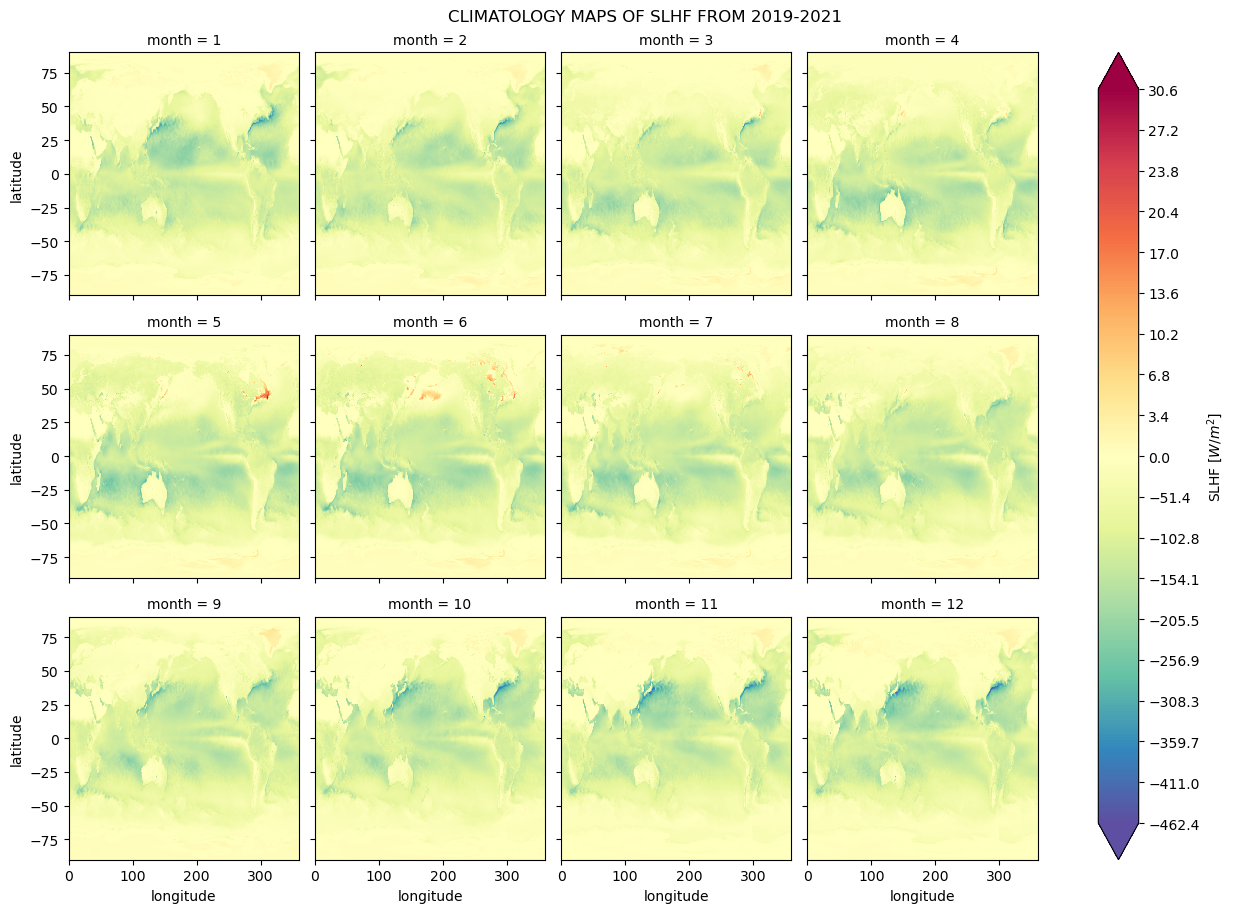

In [73]:
import numpy as np
import matplotlib.colors as colors
clim_ds = monthly_climatology(monthly_global_slhf)
var = clim_ds['slhf'].squeeze()
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt

divnorm = colors.TwoSlopeNorm(vmin=var.min(), vcenter=0, vmax=var.max())
negticks = np.linspace(var.min(), 0., 10)
posticks = np.linspace(0., var.max(), 10)
ticks = np.concatenate((negticks, np.delete(posticks,0)))
print(ticks)
p = var.plot(col='month', col_wrap=4, cmap='Spectral_r', 
             #vmin=var.min(), vmax=0.,
             vmin=var.min(), vmax=var.max(),
             extend='both',
             norm=divnorm,
             cbar_kwargs={'label':r'SLHF $[W/m^2]$',
                         'ticks':ticks})

p.cbar.update_ticks()
            #subplot_kws={'projection': ccrs.PlateCaree()},
            #transform = ccrs.PlateCaree())
#i=0
#bottom_row = [9,10,11]
#left_column = [0,4]
#corner = 8
#for ax in p.axes.flatten():
#    ax.contour(var.longitude, var.latitude, var.isel(month=i), levels=[0.], color='k')
#    ax.coastlines('50m')
#    gl = ax.gridlines(draw_labels=False)
#    # Add left labels on first column
#    if i in left_column:
#        gl.left_labels=True
#    # Add bottom labels on last row
#    elif i in bottom_row:
#        gl.bottom_labels=True
#    #Add bottom and left labels on the corner
#    elif i==corner:
#        gl.bottom_labels=True
#        gl.left_labels=True
#    i=i+1
p.fig.suptitle('CLIMATOLOGY MAPS OF SLHF FROM 2019-2021', y=1.01)
p.fig.show()

In [74]:
p.fig.savefig('ERA5_climatology_maps_slhf_2019-2021.png')